In [1]:
##import the data SPECT
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
#!cat SPECTtrain.txt
sp_names = ['F' + str(i) for i in range(23)]
sp_names[0] = 'diagnosis'
SP_train = pd.read_csv("SPECTtrain.txt", sep=",", names=sp_names)
SP_test = pd.read_csv("SPECTtest.txt", sep=",", names=sp_names)
SP_train.shape
SP_test.shape

(187, 23)

In [2]:
## Perceptron Learning
SP_train.diagnosis.replace(0, -1, inplace = True)
SP_test.diagnosis.replace(0, -1, inplace = True)
# r is the learning rate and Epochs is just the number of epochs 
def percepLearn_DF(X_train, y_train, X_test, y_test, r, Epochs):
    w = np.zeros(X_train.shape[1])
    for t in range(Epochs):
        for i, row in X_train.iterrows():
            if (np.dot(row, w)*y_train[i] <= 0):
                w = w + r*y_train[i]*row
    
    fit = X_test.dot(w)
    fit[fit<=0] = -1
    fit[fit>0] = 1
    
    E = np.sum(fit == y_test)/len(y_test)
    return [w, E]

In [3]:
## Implementation of the perceptron learning algorithm 
weights = np.zeros((9,22))
accuracyRate = np.zeros(9)
for i in range(3):
    for j in range(3):
        r = 10**(i-2)
        nE = 10*(j+1)
        weights[j+i*3], accuracyRate[j+i*3] = percepLearn_DF(X_train = SP_train.iloc[:,1:23], 
               y_train = SP_train.iloc[:, 0], 
               X_test = SP_test.iloc[:,1:23], y_test = SP_test.iloc[:,0], 
               r = r, Epochs=nE) 
        print("Fitted weights of the perceptron"
              "with leanring rate %.2f and Epochs %d" %(r, nE) + 
              " are:\n {}".format(weights[j+3*i]) +
              "\n Accuracy Rate is %.3f" %(accuracyRate[j+3*i]))

Fitted weights of the perceptronwith leanring rate 0.01 and Epochs 10 are:
 [-0.02 -0.03 -0.04 -0.02 -0.02 -0.01  0.    0.03 -0.01 -0.01  0.01 -0.02
  0.02 -0.01  0.   -0.01  0.07  0.04 -0.01 -0.02 -0.02 -0.01]
 Accuracy Rate is 0.230
Fitted weights of the perceptronwith leanring rate 0.01 and Epochs 20 are:
 [-0.02 -0.04 -0.06 -0.02 -0.03 -0.02  0.03  0.04  0.    0.02  0.02 -0.03
  0.02  0.    0.    0.    0.09  0.05  0.   -0.01  0.   -0.01]
 Accuracy Rate is 0.369
Fitted weights of the perceptronwith leanring rate 0.01 and Epochs 30 are:
 [-0.03 -0.04 -0.05 -0.02 -0.04 -0.01  0.04  0.04 -0.02  0.02  0.03 -0.03
  0.03 -0.01  0.   -0.01  0.1   0.06 -0.01 -0.01 -0.02 -0.01]
 Accuracy Rate is 0.348
Fitted weights of the perceptronwith leanring rate 0.10 and Epochs 10 are:
 [-0.1 -0.2 -0.4 -0.2 -0.2 -0.2  0.   0.3 -0.1 -0.1  0.1 -0.1  0.2 -0.1  0.
 -0.1  0.6  0.5 -0.1 -0.1 -0.1 -0.1]
 Accuracy Rate is 0.310
Fitted weights of the perceptronwith leanring rate 0.10 and Epochs 20 are:
 [-0.2 -

In [4]:
## Plot for Comparision of Accuracy Rates on Different Learning Rates and Epochs        
arDF = pd.DataFrame(accuracyRate.reshape((3,3)), 
                    columns=np.array([0.1,1,10]),
                    index=np.array([10,20,30]))
arDF

,0.1,1.0,10.0
10,0.229947,0.368984,0.347594
20,0.310160,0.256684,0.251337
30,0.203209,0.256684,0.352941


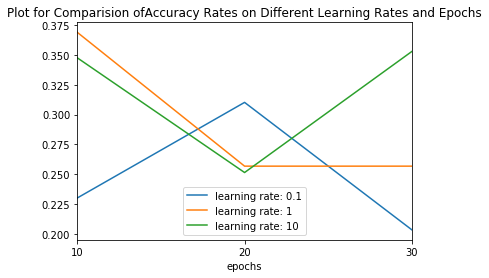

In [5]:
%matplotlib inline
plt = arDF.plot(xticks = [10,20,30], 
                title='Plot for Comparision of'
                'Accuracy Rates on Different Learning Rates and Epochs')
plt.set_xlabel('epochs')
plt.legend(['learning rate: 0.1', 'learning rate: 1', 'learning rate: 10'])